In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.- Analis exploratorio

In [48]:
df = pd.read_csv('/home/davian/ml-proyects/datasets/boston.csv')

In [49]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
df.rename({
    'CRIM':'Criminalidad',
    'ZN': 'Terreno recidencial',
    'INDUS': 'Comercio',
    'CHAS': 'Cerca del rio',
    'NOX': 'Contaminación',
    'RM': 'Nº habitaciones',
    'AGE': 'Edad',
    'DIS': 'Dis. centro empleo',
    'RAD': 'Carretera Princ.',
    'TAX': 'Impuestos',
    'PTRATIO': 'Prop. alumno/maestro',
    'B': 'Proporcion de negros',
    'LSTAT': 'Prop. bajos recursos',
    'MEDV': 'Precio',
},axis=1, inplace=True)

In [51]:
df.shape

(506, 14)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Criminalidad          506 non-null    float64
 1   Terreno recidencial   506 non-null    float64
 2   Comercio              506 non-null    float64
 3   Cerca del rio         506 non-null    int64  
 4   Contaminación         506 non-null    float64
 5   Nº habitaciones       506 non-null    float64
 6   Edad                  506 non-null    float64
 7   Dis. centro empleo    506 non-null    float64
 8   Carretera Princ.      506 non-null    int64  
 9   Impuestos             506 non-null    float64
 10  Prop. alumno/maestro  506 non-null    float64
 11  Proporcion de negros  506 non-null    float64
 12  Prop. bajos recursos  506 non-null    float64
 13  Precio                506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [53]:
df.describe()

,Criminalidad,Terreno recidencial,Comercio,Cerca del rio,Contaminación,Nº habitaciones,Edad,Dis. centro empleo,Carretera Princ.,Impuestos,Prop. alumno/maestro,Proporcion de negros,Prop. bajos recursos,Precio
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [54]:
df.columns

Index(['Criminalidad', 'Terreno recidencial', 'Comercio', 'Cerca del rio',
       'Contaminación', 'Nº habitaciones', 'Edad', 'Dis. centro empleo',
       'Carretera Princ.', 'Impuestos', 'Prop. alumno/maestro',
       'Proporcion de negros', 'Prop. bajos recursos', 'Precio'],
      dtype='object')

In [55]:
df.isna().sum()

Criminalidad            0
Terreno recidencial     0
Comercio                0
Cerca del rio           0
Contaminación           0
Nº habitaciones         0
Edad                    0
Dis. centro empleo      0
Carretera Princ.        0
Impuestos               0
Prop. alumno/maestro    0
Proporcion de negros    0
Prop. bajos recursos    0
Precio                  0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.isin([np.inf, -np.inf]).sum()

Criminalidad            0
Terreno recidencial     0
Comercio                0
Cerca del rio           0
Contaminación           0
Nº habitaciones         0
Edad                    0
Dis. centro empleo      0
Carretera Princ.        0
Impuestos               0
Prop. alumno/maestro    0
Proporcion de negros    0
Prop. bajos recursos    0
Precio                  0
dtype: int64

In [58]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [59]:
df.columns

Index(['Criminalidad', 'Terreno recidencial', 'Comercio', 'Cerca del rio',
       'Contaminación', 'Nº habitaciones', 'Edad', 'Dis. centro empleo',
       'Carretera Princ.', 'Impuestos', 'Prop. alumno/maestro',
       'Proporcion de negros', 'Prop. bajos recursos', 'Precio'],
      dtype='object')

In [60]:
df_num = ['Criminalidad', 'Terreno recidencial', 'Comercio', 'Contaminación', 'Nº habitaciones', 'Edad', 'Dis. centro empleo','Carretera Princ.', 'Impuestos', 'Prop. alumno/maestro', 'Proporcion de negros', 'Prop. bajos recursos', 'Precio']

In [61]:
df_cat = ['Cerca del rio', 'Carretera Princ.']

### A.- Analisis univariado

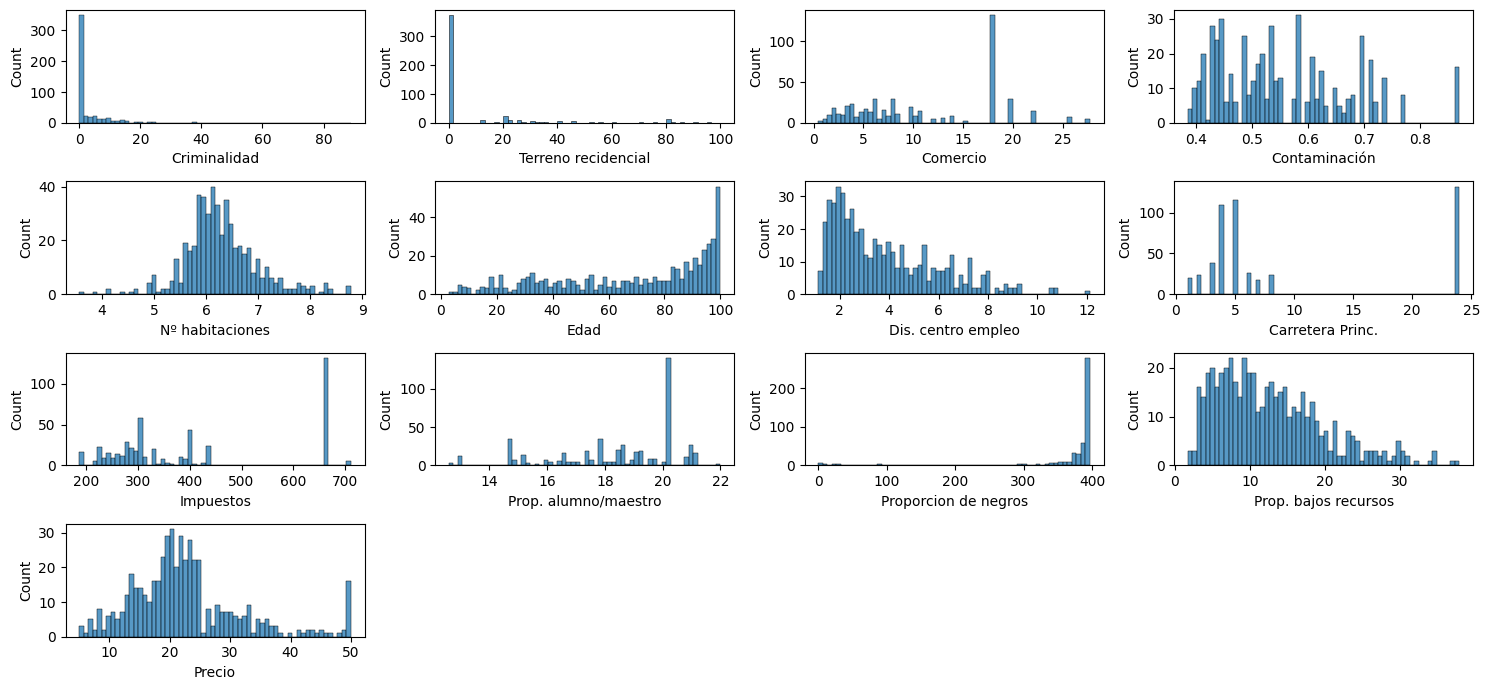

In [62]:
plt.figure(figsize=(15, 7))

for i, columna in enumerate(df_num, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=columna, bins=60)
    plt.tight_layout()

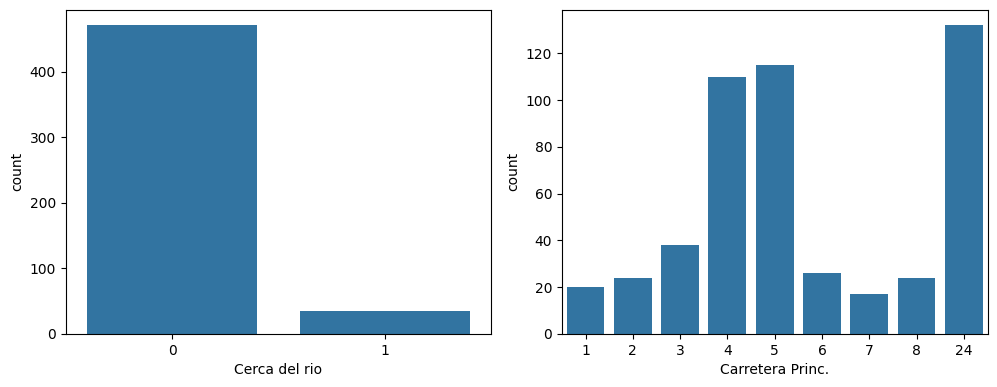

In [63]:
plt.figure(figsize=(20, 15))

for i, columna in enumerate(df_cat, start=1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=columna)
    plt.tight_layout()

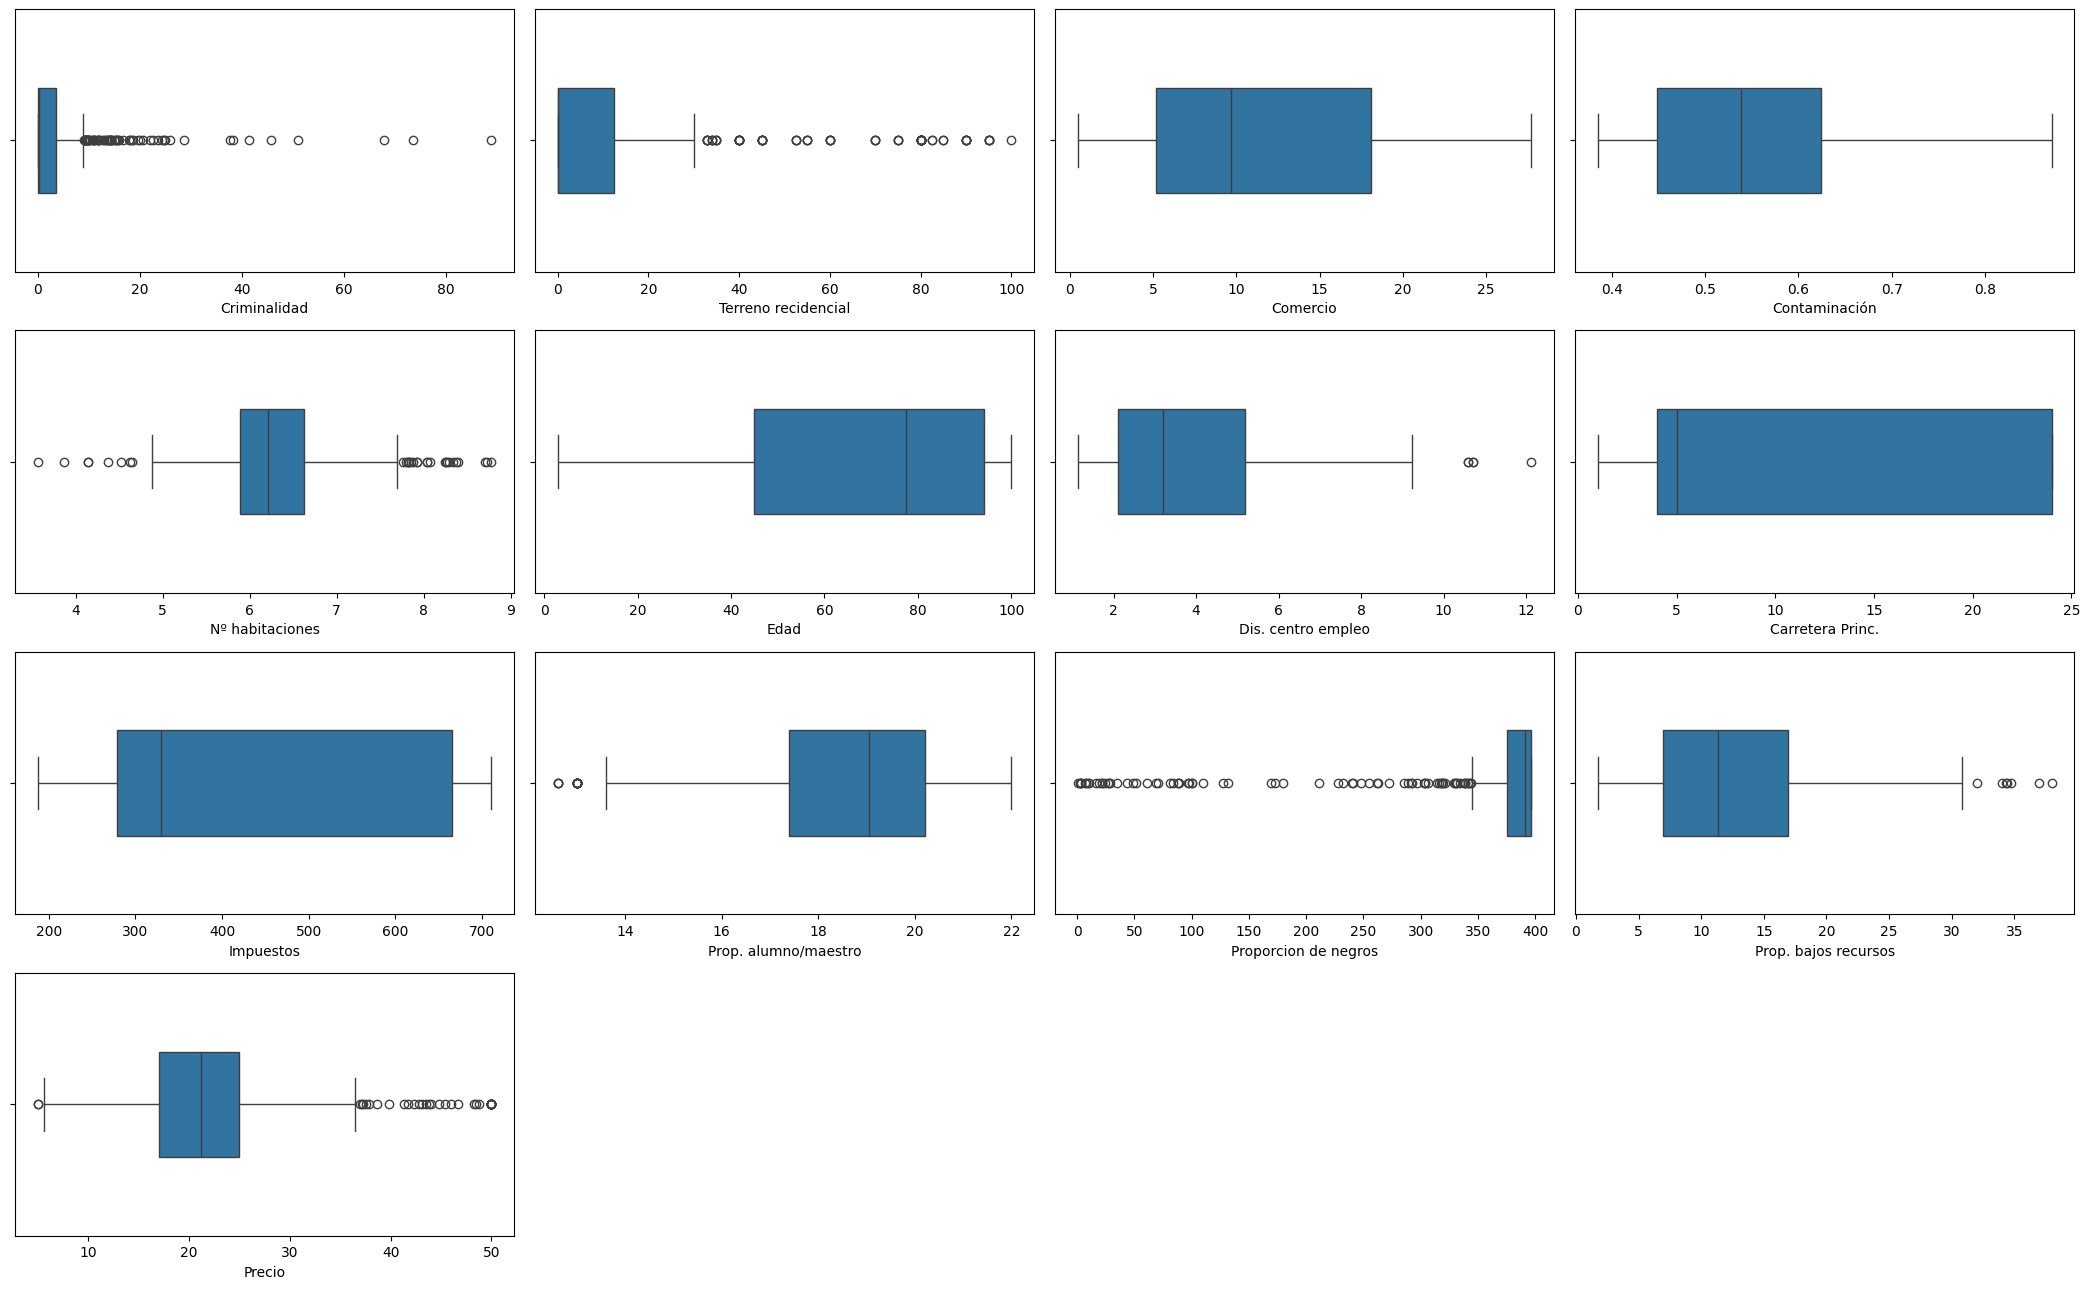

In [64]:
plt.figure(figsize=(21, 13))

for i, columna in enumerate(df_num, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=columna, width=0.4)
    plt.tight_layout()

### B.- Analisis bivariado

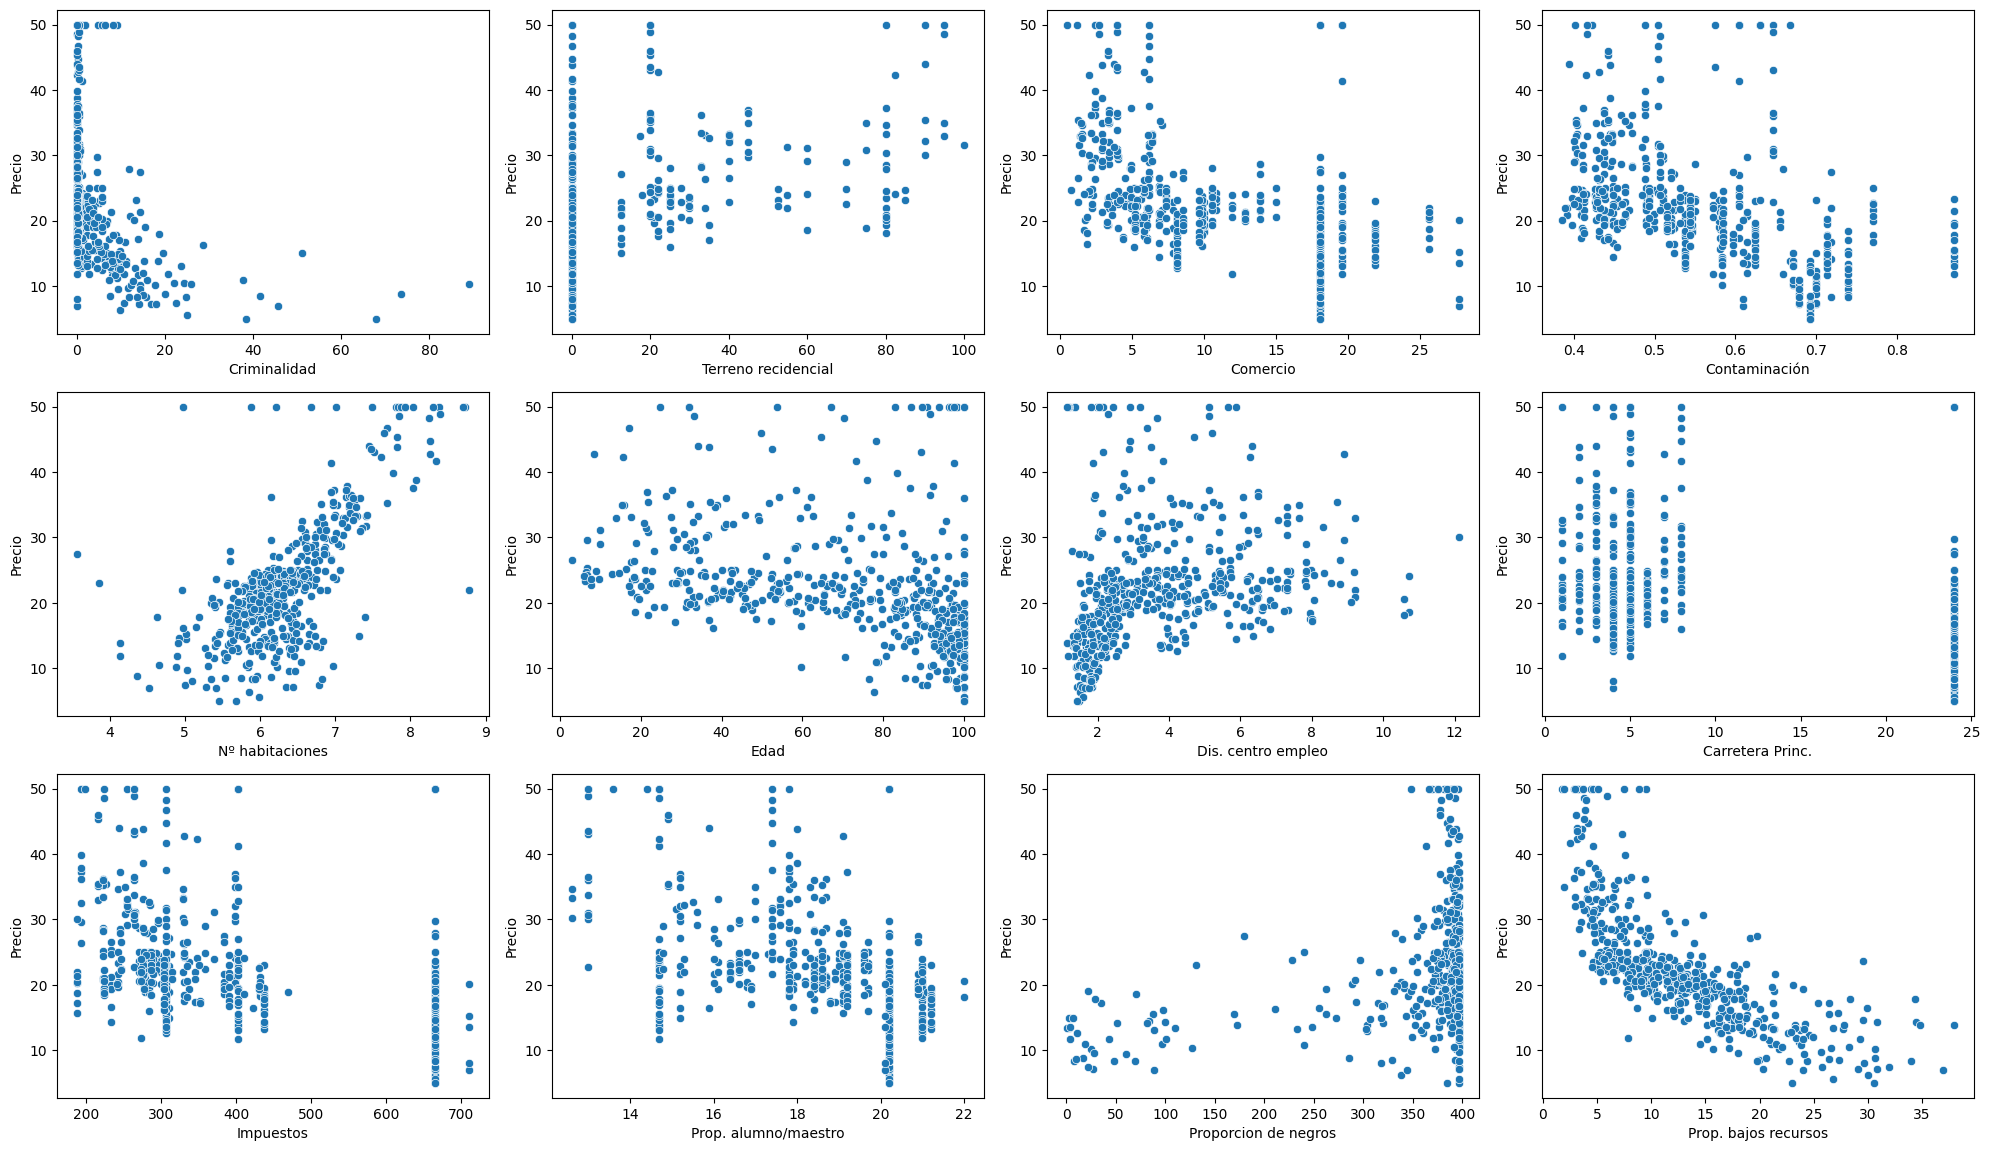

In [65]:
df_scater = ['Criminalidad', 'Terreno recidencial', 'Comercio', 'Contaminación', 'Nº habitaciones', 'Edad', 'Dis. centro empleo','Carretera Princ.', 'Impuestos', 'Prop. alumno/maestro', 'Proporcion de negros', 'Prop. bajos recursos']

plt.figure(figsize=(20, 15))

for i, columna in enumerate(df_scater, start=1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x=columna, y='Precio')
    plt.tight_layout()

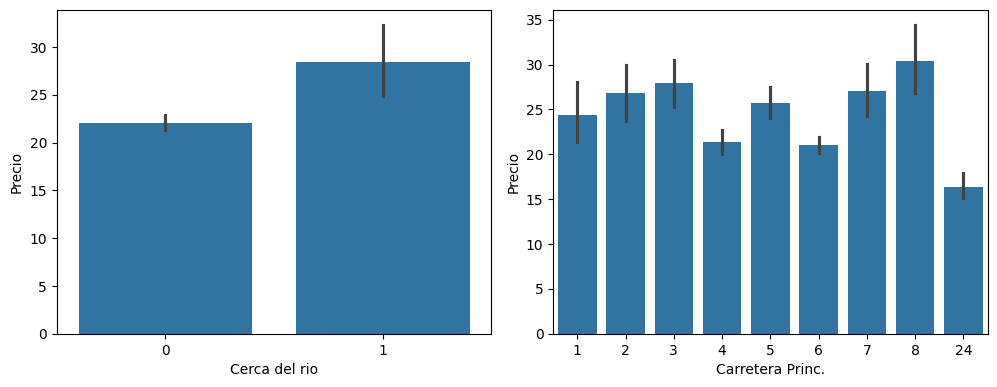

In [66]:
plt.figure(figsize=(20, 15))

for i, columna in enumerate(df_cat, start=1):
    plt.subplot(4, 4, i)
    sns.barplot(data=df, x=columna, y='Precio')
    plt.tight_layout()

<Axes: >

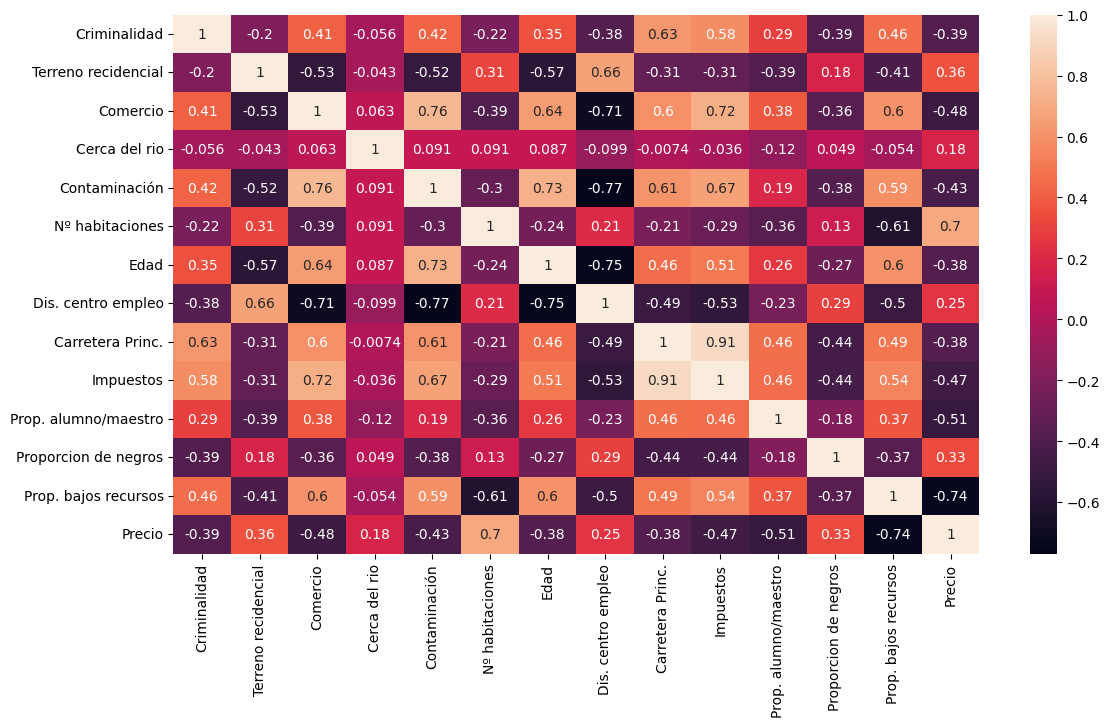

In [67]:
plt.figure(figsize=(13, 7))
sns.heatmap(data=df.corr(), annot=True)

### C.- Conclusion

* tenemos algunos valores extremos en algunas columnas, y unas distribuciones sesgadas
* precio tiene una relacion lineal con nº de habitaciones, dis. centro de empleo y prop. bajos recursos y estan altamente correlacionados

### D.- Limpieza

In [68]:
df['Prop. bajos recursos'] = -df['Prop. bajos recursos']

#

## 2.- Preprocesamiento

#### A.- Division del dataset

In [69]:
x = df.drop('Precio', axis=1)
y = df['Precio']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### B.- Transformacion de datos

En este caso no realizaremos ninguna transformacion 

#### C.- Seleccion de caracteristicas

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [72]:
rf_model.feature_importances_

array([0.0384183 , 0.00116898, 0.00475984, 0.00281881, 0.013315  ,
       0.56495163, 0.0152538 , 0.06335764, 0.00591383, 0.01238278,
       0.02300704, 0.01249047, 0.24216187])

In [73]:
feature_importance_df = pd.DataFrame({
    'feature': list(x_train),
    'importance': rf_model.feature_importances_
}).sort_values(by= 'importance', ascending=False)

feature_importance_df

,feature,importance
5,Nº habitaciones,0.564952
12,Prop. bajos recursos,0.242162
7,Dis. centro empleo,0.063358
0,Criminalidad,0.038418
10,Prop. alumno/maestro,0.023007
6,Edad,0.015254
4,Contaminación,0.013315
11,Proporcion de negros,0.012490
9,Impuestos,0.012383
8,Carretera Princ.,0.005914


<Axes: xlabel='importance', ylabel='feature'>

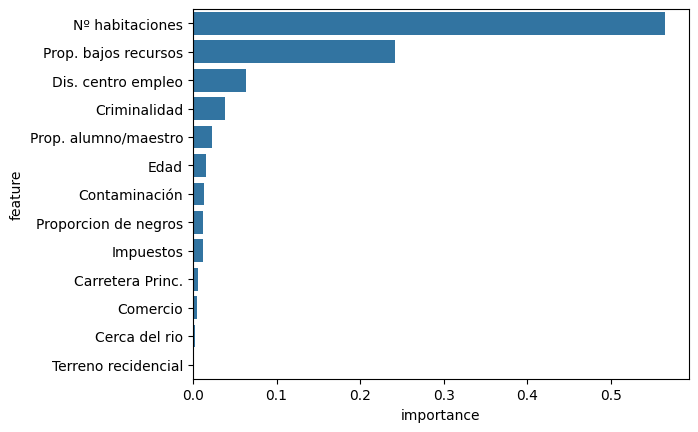

In [74]:
sns.barplot(data=feature_importance_df, x='importance', y='feature')

In [ ]:
x_train_red =x_test[['Nº habitaciones', 'Prop. bajos recursos']] 

x_test_red = x_train[['Nº habitaciones', 'Prop. bajos recursos']]

## 3.- Entrenamiento

#### A.- Busqueda del modelo

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


models = {
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'Bayesian': BayesianRidge(),
    'tree': DecisionTreeRegressor(),
    'forest':RandomForestRegressor(),
    'knn': KNeighborsRegressor(),
    'gradient': GradientBoostingRegressor()
}

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

for name, model in models.items():
    model.fit(x_train_red, y_train)
    pred = model.predict(x_test_red)

    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    results.append({'model': name, 'mse': mse, 'mae': mae, 'r2': r2})

In [78]:
results_df = pd.DataFrame(data=results)

In [80]:
results_df

,model,mse,mae,r2
0,linear,31.243291,3.898760,0.573958
1,ridge,31.195616,3.898300,0.574608
2,lasso,30.271696,3.956889,0.587207
3,Bayesian,31.146708,3.897817,0.575275
4,tree,47.653333,4.288235,0.350186
5,forest,24.435904,3.318520,0.666785
6,knn,18.975094,3.143725,0.741250
7,gradient,20.961417,3.021863,0.714164


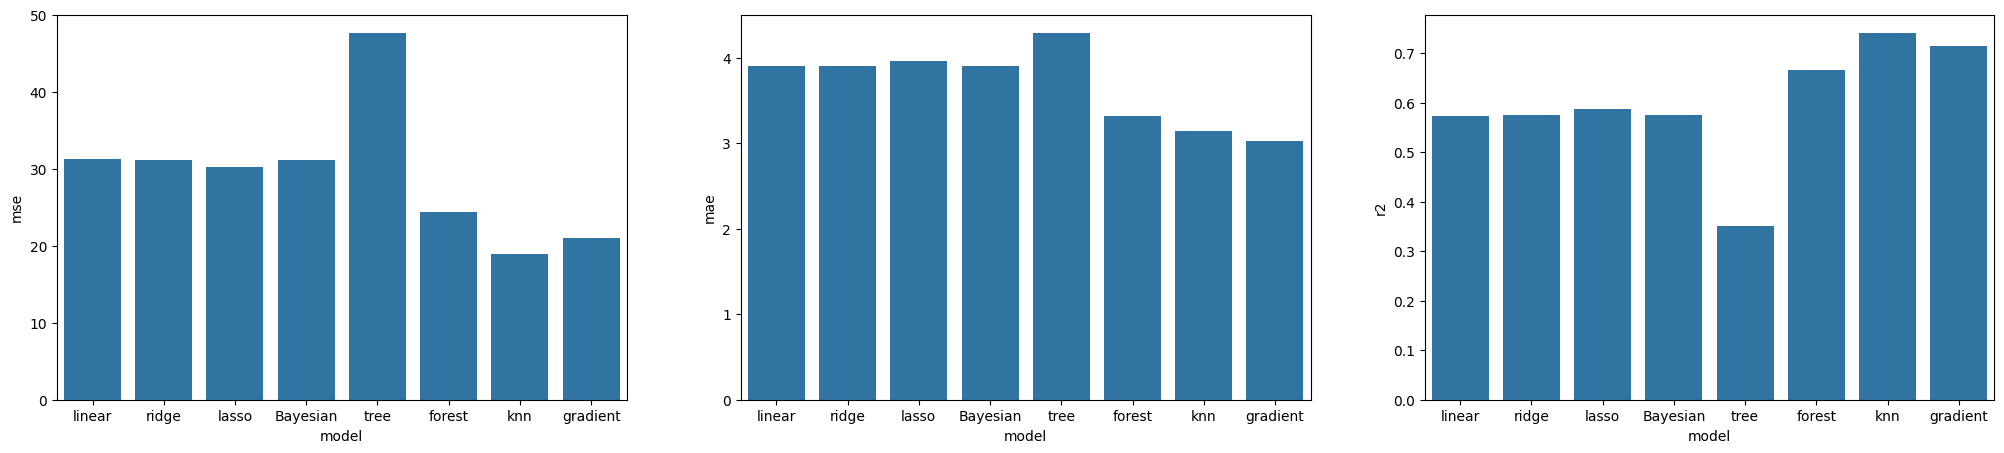

In [81]:
plt.figure(figsize=(25, 5))

metrics = ['mse', 'mae', 'r2']

for i, metric in enumerate(metrics, start=1):
    plt.subplot(1, 3, i)
    sns.barplot(data=results_df, x='model', y=metric)

#### B.- Busqueda de hiperparametros

In [82]:
hipermatros = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],  
    'p': [1, 2, 3],  
    'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev'], 
    'n_jobs': [None, -1, 1, 2, 4],
}

In [83]:
from sklearn.model_selection import GridSearchCV

knr_model = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=hipermatros, cv=5)

knr_model.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['minkowski', 'manhattan', 'euclidean',
                                    'chebyshev'],
                         'n_jobs': [None, -1, 1, 2, 4],
                         'n_neighbors': [3, 5, 10, 15, 20], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [84]:
knr_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

## 4.- Evaluacuion

In [86]:
y_pred = knr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse:', mse, '\nmae:', mae, '\nr2:', r2)


mse: 20.02569724535518 
mae: 2.5932800080563205 
r2: 0.7269239853400877


In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

In [ ]:
error = y_test - y_pred

In [ ]:
sns.histplot(error, bins=50)